<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/Copy_of_twitter_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Twitter_Data.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,clean_text,category
49977,begins addressing the nation says india has es...,0.0
37638,modi responsible for this,1.0
25441,what would the sequel movie called kyoki main ...,1.0
48399,congratulations india successful completion th...,1.0
80335,mission desperation really \nsee the headlines...,1.0
...,...,...
95343,good luck,1.0
80005,you make any record during ipl please not anno...,0.0
73600,congratulations drdo isro and india for succes...,1.0
9340,modi govt giving farmers 75k under pmkisan 60k...,0.0


In [16]:
#No of a categories
len(set(df['category']))

10

In [17]:
df = df.dropna()

In [18]:
df.groupby('category').category.count()

category
-1.0    35509
 0.0    55211
 1.0    72249
Name: category, dtype: int64

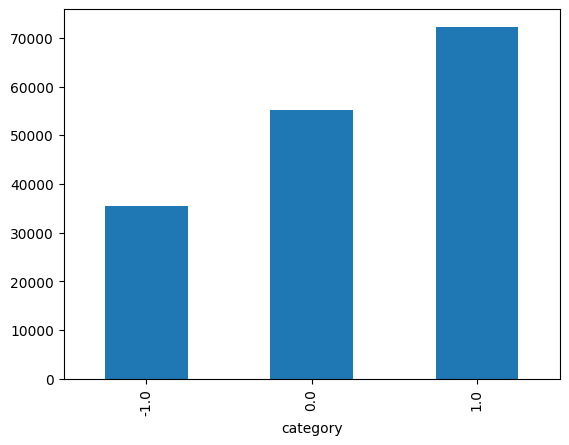

In [19]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [23]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
a = "Hello_World!"
regs = re.sub("[^a-zA-Z]", " ", a)
regs

'Hello World '

In [25]:
# Data Cleaning using regex
regs = re.sub("[^a-zA-Z]", " ", df['clean_text'][126]).lower()
regs

'used bjp money visit japan singapore usa for yrs and left bjp when modi asked how tdp spend bjp moneyexp details yrs political experience use increased pension dwacra yuvanestam schemes just before elections win votes'

In [26]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
print(data)
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")

['I', 'am', 'loving', 'computing']


'i am love comput'

In [29]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = df['clean_text'][0].split()
print(data)
"".join([stemmer.stem(i) for i in df['clean_text'][0]])
# stemmer.stem("")

['when', 'modi', 'promised', 'â\x80\x9cminimum', 'government', 'maximum', 'governanceâ\x80\x9d', 'expected', 'him', 'begin', 'the', 'difficult', 'job', 'reforming', 'the', 'state', 'why', 'does', 'take', 'years', 'get', 'justice', 'state', 'should', 'and', 'not', 'business', 'and', 'should', 'exit', 'psus', 'and', 'temples']


'when modi promised â\x80\x9cminimum government maximum governanceâ\x80\x9d expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

In [30]:
data = df['clean_text'][0].split()
for i in words:
  if i in data:
    c = data.count(i)
    for j in range(c):
      data.remove(i)
" ".join(data)


'modi promised â\x80\x9cminimum government maximum governanceâ\x80\x9d expected begin difficult job reforming state take years get justice state business exit psus temples'

In [31]:
# Data Cleaning removing stopwords
words = stopwords.words("english")
print(words)
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

'used bjp money visit japan singapore usa yrs left bjp modi asked tdp spend bjp moneyexp details yrs political experience use increased pension dwacra yuvanestam schemes elections win votes'

In [33]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['cleaned'] = list(map(lambda x: " ".join([i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]),df['clean_text']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

<ipython-input-33-86b62dd9392a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = list(map(lambda x: " ".join([i for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]),df['clean_text']))
<ipython-input-33-86b62dd9392a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))


,clean_text,category,cleaned
49977,begins addressing the nation says india has es...,0.0,begin address nation say india establish space...
37638,modi responsible for this,1.0,modi respons
25441,what would the sequel movie called kyoki main ...,1.0,would sequel movi call kyoki main jhoot nahi b...
48399,congratulations india successful completion th...,1.0,congratul india success complet mission modi h...
80335,mission desperation really \nsee the headlines...,1.0,mission desper realli see headlin newspap low ...
...,...,...,...
95343,good luck,1.0,good luck
80005,you make any record during ipl please not anno...,0.0,make record ipl pleas announc modi announc order
73600,congratulations drdo isro and india for succes...,1.0,congratul drdo isro india success launch indig...
9340,modi govt giving farmers 75k under pmkisan 60k...,0.0,modi govt give farmer k pmkisan k mnrega per y...


In [34]:
# " ".join([stemmer.stem(i) for i in without_stop_words_of_a_news.lower().split()])

In [35]:
# list(filter(lambda x: [stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words],df['text']))

In [36]:
# #cleaning dataset
# nltk.download('stopwords')
# stemmer = PorterStemmer()
# words = stopwords.words("english")
# words.extend(['a','an','the'])
# df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
# # df['newcleaned'] = [(i for i in list(df['cleaned'])).split() if i not in words ]
# df

In [37]:
df.to_csv('cleaned_news.csv')

In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

In [39]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
# df

In [40]:
# print(words)

In [41]:
# words = stopwords.words("nepali")
# words

In [42]:
# df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
# df

In [54]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['cleaned']
Y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=500)),
                     ('clf', LogisticRegression(random_state=1))])

# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# pipeline = Pipeline([
#     ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
#     ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
#     ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM
# ])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
# with open('LogisticRegression.pickle', 'wb') as f:
#     pickle.dump(model, f)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print(X_test,y_test)

73419     intent creat debri space agenc unintent great ...
60291     chowkidar narendra modi decis take man india e...
81468                                          big fan modi
55119     time narendra modi explain black money black m...
5128      soul say rahul unfit vote modi congress propag...
                                ...                        
152623    hahaha hahahaha hahahahath capabl sinc time ne...
9199      nagpur wardha fiasco congress make anoth yet a...
83633                                     thank amrita modi
11306     pic tell whole stori nation modi puppet terror...
79962     rahul gandhi standup comedian becom troll obse...
Name: cleaned, Length: 8149, dtype: object 73419     1.0
60291     1.0
81468     0.0
55119    -1.0
5128      1.0
         ... 
152623    1.0
9199      0.0
83633     1.0
11306     1.0
79962    -1.0
Name: category, Length: 8149, dtype: float64


In [56]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_test_news_cat = model.predict(X_test)
predict_train_news_cat = model.predict(X_train)
print("Test accuracy = ",accuracy_score(y_test,predict_test_news_cat))
print("Train accuracy = ",accuracy_score(y_train,predict_train_news_cat))
print('\n')

Test accuracy =  0.8419437967848816
Train accuracy =  0.8394135124660896




In [66]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = The government will have to spend almost Rs 1 billion to organize the International Indian Film Academy (IIFA) Awards. The organizers have demanded US$ 4 million from Nepal for getting to organize the event, according to Nepal Tourism Board (NTB) CEO Deepak Raj Joshi. The Cabinet has decided to organize the event in Nepal with NTB and Kathmandu Metropolitan City (KMC) the joint co-organizers. Coordinator of the Visit Nepal Year Suraj Vaidya and Joshi have been handed the responsibility to negotiate with the organizers about the event fee. "We are in course of discussion. We have only held discussions on the venue and guests but have yet to sign agreement. We have yet to finalize event fee as well," Joshi told Setopati. Joshi revealed that the organizers have demanded the amount for technical preparations including event management to fees for the artistes. But both the NTB and KMC do not have working procedure to pay a foreign company in such manner. A member of the high-l

              precision    recall  f1-score   support

        -1.0       0.81      0.72      0.76      1741
         0.0       0.80      0.92      0.86      2856
         1.0       0.90      0.84      0.87      3552

    accuracy                           0.84      8149
   macro avg       0.84      0.83      0.83      8149
weighted avg       0.84      0.84      0.84      8149

[[1251  272  218]
 [  92 2636  128]
 [ 206  372 2974]]


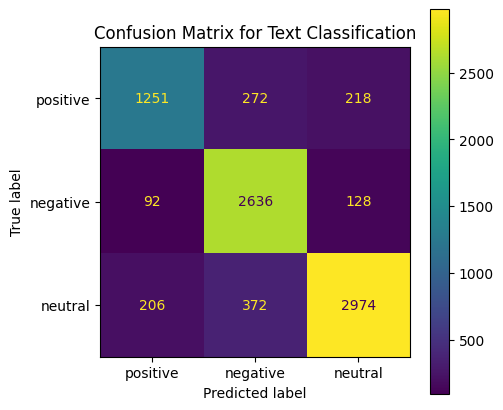

In [68]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest,model.predict(X_test))
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
class_names = ['positive','negative','neutral']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for Text Classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);